# Loan Prediction

## References:

[1]https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#ProblemStatement

## Problem:

    Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

    Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

## Description about the Data Columns:

    train data set :  614
    test data set :  367

Variable| Description
:-:|:-:
Loan_ID|   Unique Loan ID
Gender | Male/ Female
Married |Applicant married (Y/N)
Dependents|  Number of dependents
Education  | Applicant Education (Graduate/ Under Graduate)
Self_Employed|   Self employed (Y/N)
ApplicantIncome|   Applicant income
CoapplicantIncome|   Coapplicant income
LoanAmount   |Loan amount in thousands
Loan_Amount_Term|   Term of loan in months
Credit_History   |credit history meets guidelines
Property_Area  |Urban/ Semi Urban/ Rural
Loan_Status   |Loan approved (Y/N)

## Hypothesis Generation :

    (1) Salary: Applicants with high income should have more chances of loan approval.
    
    (2) Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.
    
    (3) Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

    (4) Loan term: Loan for less time period and less amount should have higher chances of approval.

    (5) EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')

In [3]:
train['Source'] = 'train'
test['Source'] = 'test'
data = pd.concat([train,test],ignore_index=True,sort=False)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train


## Explolatory Data Analysis:

### 1. Univariate Analysis

   1.1 **Categorical Variables**

In [4]:
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

categorical_columns = [x for x in categorical_columns if x not in ['Source','Loan_ID']]

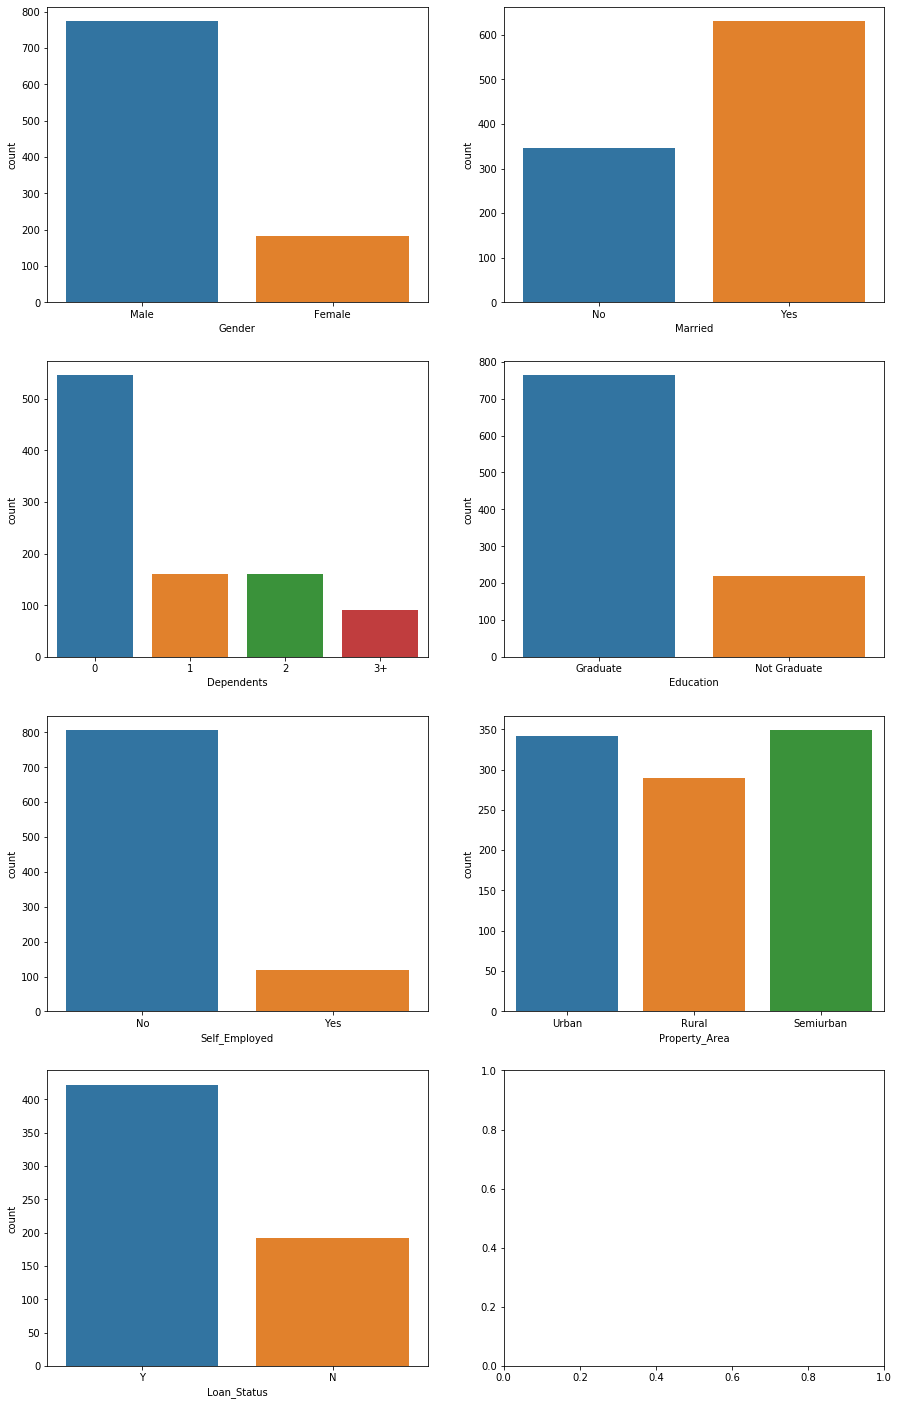

In [5]:
fig, ax = plt.subplots(4,2, figsize=(15, 25))
for variable, subplot in zip(categorical_columns, ax.flatten()):
    sns.countplot(data[variable], ax=subplot)

In [6]:
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

categorical_columns = [x for x in categorical_columns if x not in ['Source','Loan_ID']]

for col in categorical_columns:
    print('\n\nFrequency of categories for variable : %s'%col)
    print(data[col].value_counts())



Frequency of categories for variable : Gender
Male      775
Female    182
Name: Gender, dtype: int64


Frequency of categories for variable : Married
Yes    631
No     347
Name: Married, dtype: int64


Frequency of categories for variable : Dependents
0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64


Frequency of categories for variable : Education
Graduate        763
Not Graduate    218
Name: Education, dtype: int64


Frequency of categories for variable : Self_Employed
No     807
Yes    119
Name: Self_Employed, dtype: int64


Frequency of categories for variable : Property_Area
Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64


Frequency of categories for variable : Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


**Conclusion :**

    1. Around 80% applicants in the dataset are male.
    
    2. Around 65% of the applicants in the dataset are married.
    
    3. Most of the applicants don’t have any dependents.
    
    4. Around 80% of the applicants are Graduate.
    
    5. Around 15% applicants in the dataset are self employed.
    
    6. Most of the applicants are from Semiurban area.
    
    7. The loan of 422(around 69%) people out of 614 was approved.
    
    
        

1.2 **Numerical Variables**

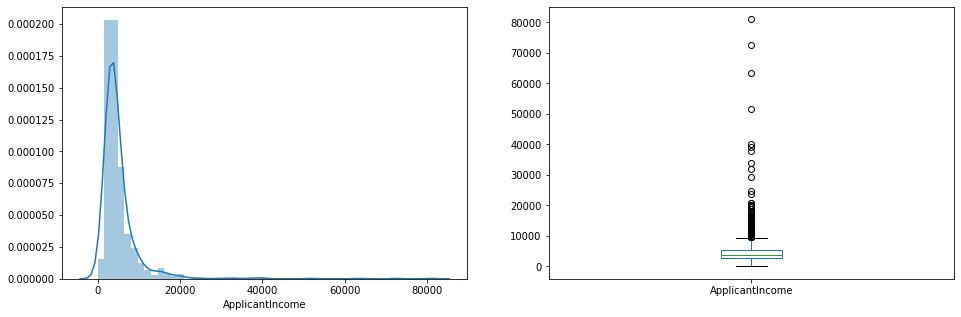

In [7]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(data['ApplicantIncome']); 
plt.subplot(122) 
data['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

    It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed.We will try to make it normal in later sections as algorithms works better if the data is normally distributed.
    
    The boxplot confirms the presence of a lot of outliers/extreme values. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

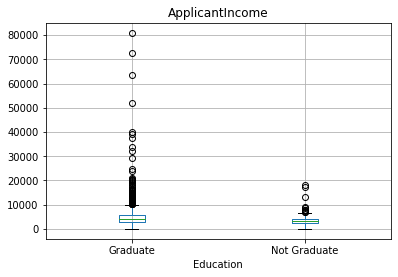

In [8]:
data.boxplot(column ='ApplicantIncome',by = 'Education')
plt.suptitle("")
plt.show()

    We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.
    
    Let’s look at the Coapplicant income distribution.

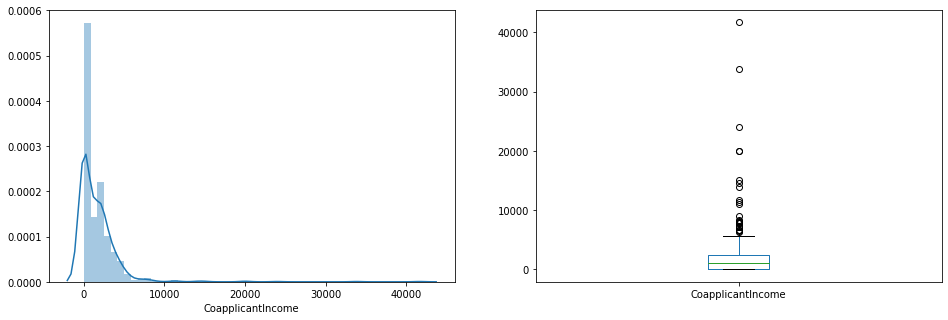

In [9]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['CoapplicantIncome']);
plt.subplot(122)
data['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

    We see a similar distribution as that of the applicant income. We also see a lot of outliers in the coapplicant income and it is not normally distributed.
    
    Let’s look at the distribution of LoanAmount variable.

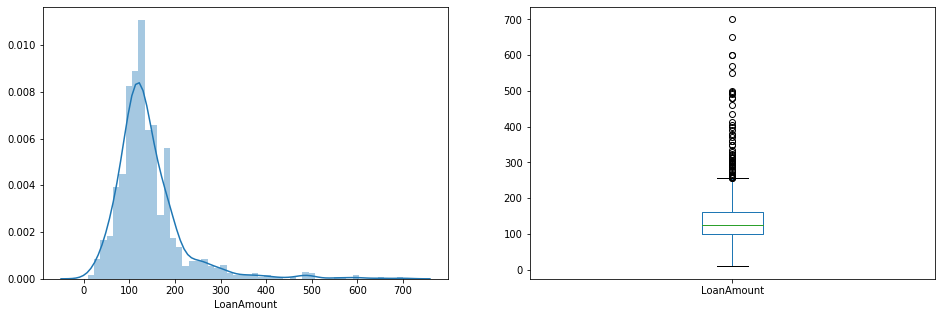

In [10]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['LoanAmount'])
plt.subplot(122)
data['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

    We see a lot of outliers in this variable and the distribution is normal. We will treat the outliers in later sections.

### 2. Bivariate Analysis

    Lets recall some of the hypotheses that we generated earlier:
    
    (1) Salary: Applicants with high income should have more chances of loan approval.
    
    (2) Credit history: Applicants who have good credit history should have higher chances of loan approval.
    
    (3) Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

    (4) Loan term: Loan for less time period and less amount should have higher chances of approval.

    (5) EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.
    
    Lets try to test the above mentioned hypotheses using bivariate analysis
    
    After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

**2.1 Categorical Variable vs Target Variable**

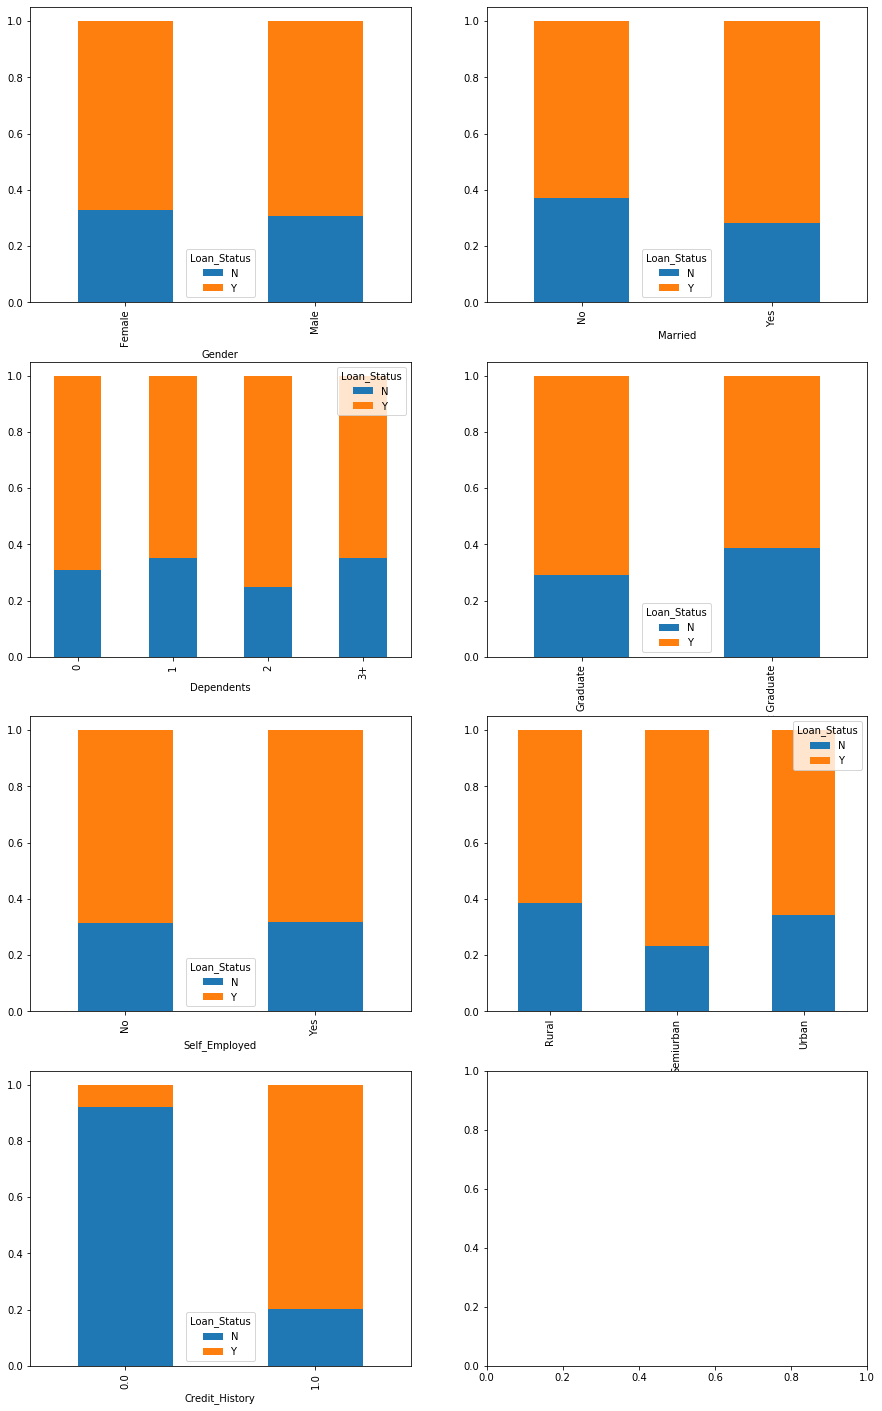

In [11]:
Gender=pd.crosstab(data['Gender'],data['Loan_Status']) 
Married=pd.crosstab(data['Married'],data['Loan_Status']) 
Dependents=pd.crosstab(data['Dependents'],data['Loan_Status']) 
Education=pd.crosstab(data['Education'],data['Loan_Status']) 
Self_Employed=pd.crosstab(data['Self_Employed'],data['Loan_Status']) 
Property_Area = pd.crosstab(data['Property_Area'],data['Loan_Status'])
Credit_History = pd.crosstab(data['Credit_History'],data['Loan_Status'])

fig, axs = plt.subplots(nrows=4, ncols=2,figsize=(15,25))

Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axs[0][0]) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axs[0][1]) 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,ax=axs[1][0]) 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axs[1][1]) 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=axs[2][0]) 
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axs[2][1])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axs[3][0])
plt.show()

**Conclusion :**

    (1) Distribution of applicants with male or female is similar across both the categories of Loan_Status.
    
    (2) proportion of married applicants is higher for the approved loans.
    
    (3) Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
    
    (4) Proportion of loans approved in semiurban area is higher.
    
    (5) proportion of loans approved for applicants with credit history as 1 is higher.
    

**2.2 Numerical Independent Variable vs Target Variable**

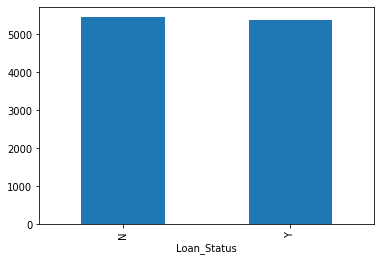

In [12]:
# visualize ApplicantIncome
data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()

    We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [13]:
data['ApplicantIncome'].describe()

count      981.000000
mean      5179.795107
std       5695.104533
min          0.000000
25%       2875.000000
50%       3800.000000
75%       5516.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

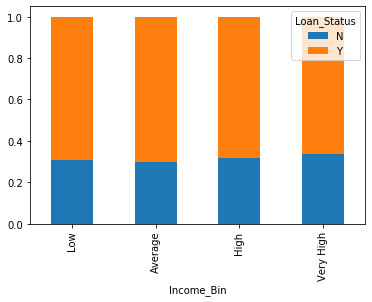

In [14]:
bins = [0,3000,4000,6000,81000]
group = ['Low','Average','High','Very High']
data['Income_Bin'] = pd.cut(data['ApplicantIncome'],bins,labels=group)

Income_Bin = pd.crosstab(data['Income_Bin'],data['Loan_Status'])
Income_Bin.div(Income_Bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()

    It can be affered that ApplicantIncome does not affect the chances of loan approval which contradics our hypothesis in which we assumed that if the ApplicantIncome is high the chances of loan approval will also be high.

In [15]:
data['CoapplicantIncome'].describe()

count      981.000000
mean      1601.916330
std       2718.772806
min          0.000000
25%          0.000000
50%       1110.000000
75%       2365.000000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

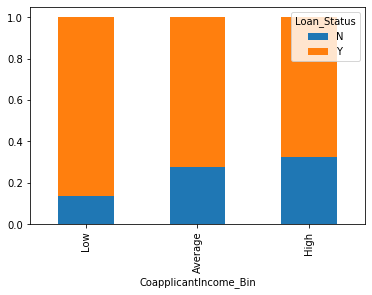

In [16]:
bins = [0,1000,3000,41000]
group = ['Low','Average','High']
data['CoapplicantIncome_Bin'] = pd.cut(data['CoapplicantIncome'],bins,labels=group)

coapplicantincome_bin = pd.crosstab(data['CoapplicantIncome_Bin'],data['Loan_Status'])
coapplicantincome_bin.div(coapplicantincome_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()

    It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right.The possible reason behind this may be that most of applicant don't have any coapplicant so coaaplicant income for such applicant is 0 and hence the loan approval is not dependent on it.So we can make new variable in which we will combine the applicant's and coapplicant's income to visualize the combined effect of income on loan approval.
        

In [17]:
data['Total_Income'] = data['ApplicantIncome']+data['CoapplicantIncome']
data['Total_Income'].describe()

count      981.000000
mean      6781.711437
std       6023.952550
min       1442.000000
25%       4166.000000
50%       5314.000000
75%       7308.000000
max      81000.000000
Name: Total_Income, dtype: float64

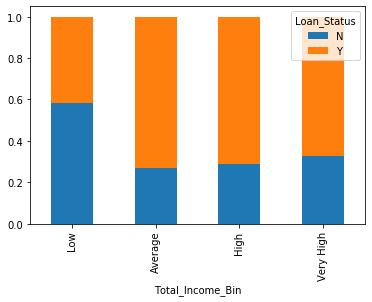

In [18]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']
data['Total_Income_Bin'] = pd.cut(data['Total_Income'],bins,labels=group)

total_income_bin = pd.crosstab(data['Total_Income_Bin'],data['Loan_Status'])
total_income_bin.div(total_income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()


    We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

In [19]:
data['LoanAmount'].describe()

count    954.000000
mean     142.511530
std       77.421743
min        9.000000
25%      100.000000
50%      126.000000
75%      162.000000
max      700.000000
Name: LoanAmount, dtype: float64

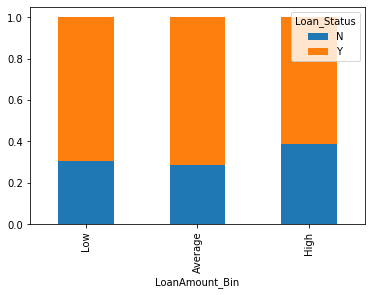

In [20]:
bins = [0,100,200,700]
group = ['Low','Average','High']

data['LoanAmount_Bin'] = pd.cut(data['LoanAmount'],bins,labels=group)

LoanAmount_bin = pd.crosstab(data['LoanAmount_Bin'],data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()

    It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.
    
    Let’s drop the bins which we created for the exploration part. 

In [21]:
data.drop(['Income_Bin', 'CoapplicantIncome_Bin', 'LoanAmount_Bin', 'Total_Income_Bin', 'Total_Income'], axis=1,inplace=True)

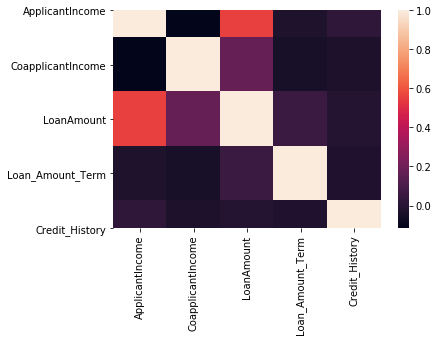

In [22]:
sns.heatmap(data.corr())

    We see that the most correlated variables are (ApplicantIncome - LoanAmount). LoanAmount is also correlated with CoapplicantIncome.

In [23]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
Loan_ID              981 non-null object
Gender               957 non-null object
Married              978 non-null object
Dependents           956 non-null object
Education            981 non-null object
Self_Employed        926 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Credit_History       902 non-null float64
Property_Area        981 non-null object
Loan_Status          614 non-null object
Source               981 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 107.4+ KB


## Handling Missing Values :

In [25]:
data.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
Source                 0
dtype: int64

    We can consider these methods to fill the missing values:

    (1) For numerical variables: imputation using mean or median
    (2) For categorical variables: imputation using mode

In [26]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True) 
data['Married'].fillna(data['Married'].mode()[0], inplace=True) 
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True) 
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True) 
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [27]:
data.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
Source                 0
dtype: int64

## Getting new data columns :

    1) We have two column named 'ApplicantIncome' and 'CoapplicantIncome'. It may be the case total income might have good impact on Loan Status.
    
    2) It may be the case EMI is good impact on Loan Status as it combine two column 'LoanAmount' and 'Loan_Amount_Term'. 
    
    3) It may be the case Debt amount ratio(EMI*12/total income) is good impact on loan Status.

Hence the formula that can be used is

    1) Total Income = Applicant Income + Co-applicant Income
    
    2) The mathematical formula for calculating EMIs is:
        
        EMI = [P x R x (1+R)^N]/[(1+R)^N-1]
        
        where P stands for the loan amount or principal, R is the interest rate per month and N is the number of monthly instalments.
        for home loans let’s check the interest rates in google for several banks. I have found that on an average it would be around 8.5% to 9.5%. Hence for safe-side I am assuming that 9% is the interest rate.
        
    3) Debt_Amount_Ratio = 12*EMI / TotalIncome.

In [28]:
# creating new column TotalIncome
# TotalIncome = ApplicantIncome + CoapplicantIncome

data['TotalIncome'] = data['ApplicantIncome']+data['CoapplicantIncome']
data['TotalIncome']

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
976    5786.0
977    4867.0
978    5243.0
979    7393.0
980    9200.0
Name: TotalIncome, Length: 981, dtype: float64

In [29]:
# creating new column EMI
# EMI = [P x R x (1+R)^N]/[(1+R)^N-1]

# for one month interest
R = 9/(12*100)

EMI = []
# calculate A = P x R x (1+R)^N
for P, N in zip(data['LoanAmount'],data['Loan_Amount_Term']):
    EMI.append((P*R*pow(1+R,N)) / (pow(1+R,N-1)))
    
data['EMI'] = EMI

In [30]:
# creating new column debt_amount_ratio

# debt_amount_ratio = (EMI)*12 / TotalIncome
Debt_Amount_Ratio = []
for i,j in zip(data['TotalIncome'],data['EMI']):
    Debt_Amount_Ratio.append((j*12.0)/i)

data['Debt_Amount_Ratio'] = Debt_Amount_Ratio

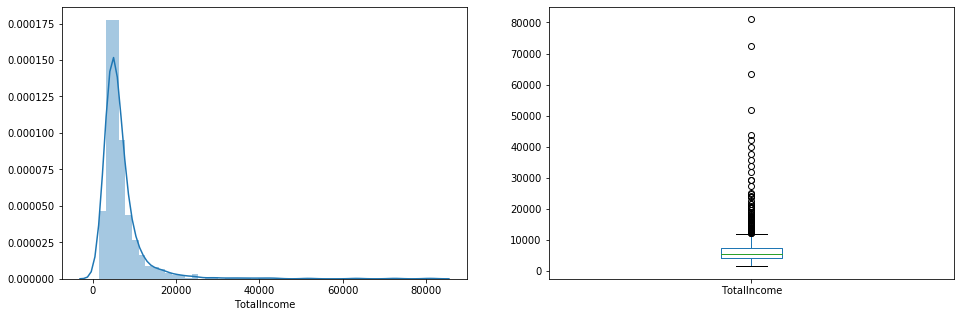

In [31]:
# check the distribution of TotalIncome variable
plt.figure(1)
plt.subplot(121)
sns.distplot(data['TotalIncome'])
plt.subplot(122)
data['TotalIncome'].plot.box(figsize=(16,5))
plt.show()

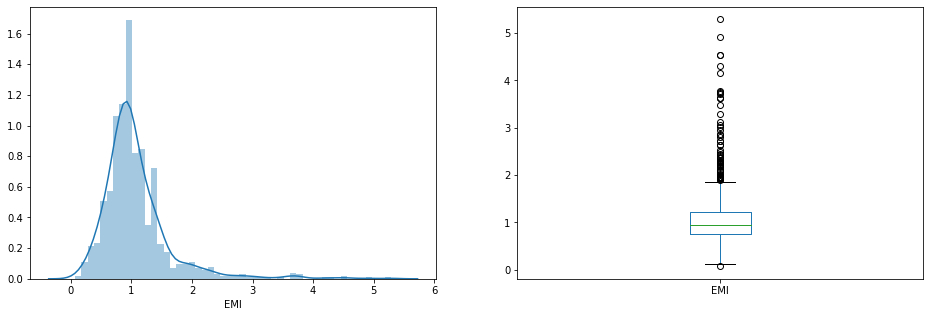

In [32]:
# check the distribution of EMI variable
plt.figure(1)
plt.subplot(121)
sns.distplot(data['EMI'])
plt.subplot(122)
data['EMI'].plot.box(figsize=(16,5))
plt.show()

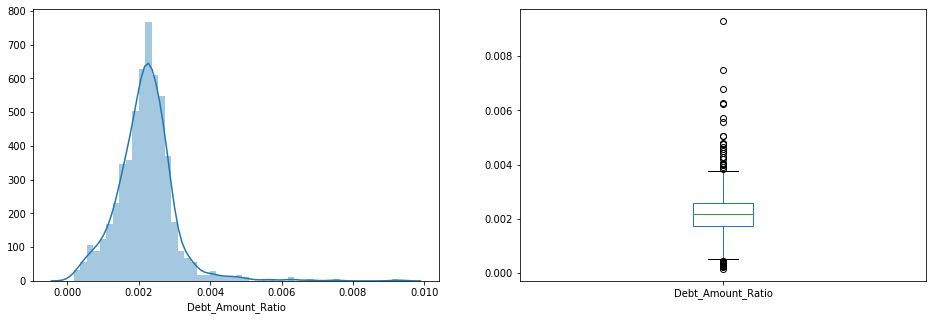

In [33]:
# check the distribution of EMI variable
plt.figure(1)
plt.subplot(121)
sns.distplot(data['Debt_Amount_Ratio'])
plt.subplot(122)
data['Debt_Amount_Ratio'].plot.box(figsize=(16,5))
plt.show()

    We can see that TotalIncome is not normally distributed and there are lots of outliers and also EMI & Debt_Amount_Ratio are not normally distributed.
    

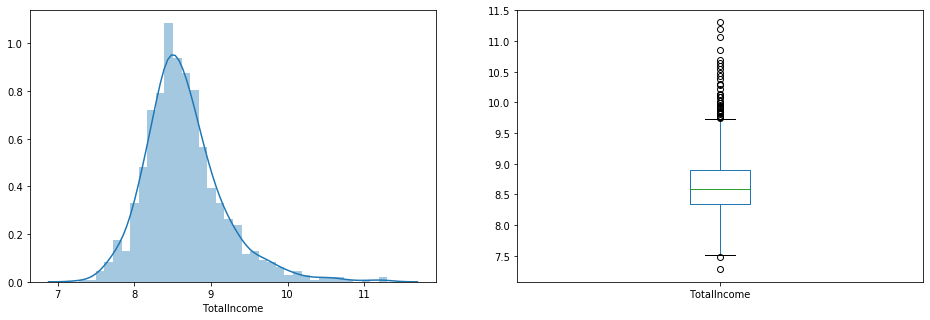

In [34]:
# normilize TotalIncome variable 

data['TotalIncome'] = np.log(data['TotalIncome'])

plt.figure(1)
plt.subplot(121)
sns.distplot(data['TotalIncome'])
plt.subplot(122)
data['TotalIncome'].plot.box(figsize=(16,5))
plt.show()

    Now, We can see that distribusion of TotalIncome is normal.

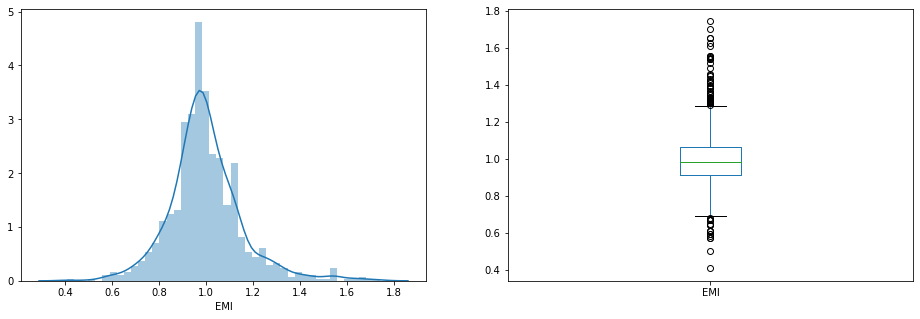

In [35]:
# normilize EMI variable 

data['EMI'] = (data['EMI']**(1/3))

plt.figure(1)
plt.subplot(121)
sns.distplot(data['EMI'])
plt.subplot(122)
data['EMI'].plot.box(figsize=(16,5))
plt.show()

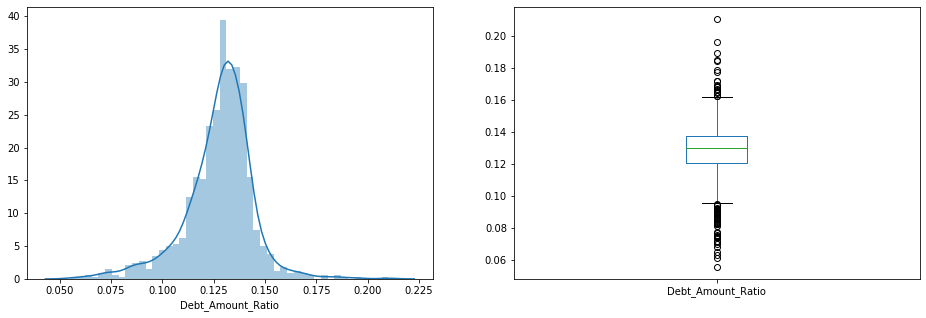

In [36]:
# normalize Debt_Amount_Ratio variable 

data['Debt_Amount_Ratio'] = (data['Debt_Amount_Ratio']**(1/3))

plt.figure(1)
plt.subplot(121)
sns.distplot(data['Debt_Amount_Ratio'])
plt.subplot(122)
data['Debt_Amount_Ratio'].plot.box(figsize=(16,5))
plt.show()

In [37]:
# dropping the orignal columns

data.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1,inplace=True)
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Source,TotalIncome,EMI,Debt_Amount_Ratio
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y,train,8.674026,0.983767,0.125004
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N,train,8.714568,0.988945,0.123976
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,train,8.006368,0.793019,0.125884
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,train,8.505323,0.967897,0.130102
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y,train,8.699515,1.021351,0.128682
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,1.0,Urban,NaN,test,8.663196,0.948699,0.120984
977,LP002975,Male,Yes,0,Graduate,No,1.0,Urban,NaN,test,8.490233,0.954263,0.128916
978,LP002980,Male,No,0,Graduate,No,1.0,Semiurban,NaN,test,8.564649,0.983767,0.129646
979,LP002986,Male,Yes,0,Graduate,No,1.0,Rural,NaN,test,8.908289,1.060851,0.124674


## One Hot Encoding of categorical variables

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()

categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

categorical_columns = [x for x in categorical_columns if x not in ['Source','Loan_ID','Loan_Status']]
print(categorical_columns)

for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

#OneHotEncoding
data = pd.get_dummies(data,columns=categorical_columns,drop_first=True)

data.dtypes

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


Loan_ID               object
Credit_History       float64
Loan_Status           object
Source                object
TotalIncome          float64
EMI                  float64
Debt_Amount_Ratio    float64
Gender_1               uint8
Married_1              uint8
Dependents_1           uint8
Dependents_2           uint8
Dependents_3           uint8
Education_1            uint8
Self_Employed_1        uint8
Property_Area_1        uint8
Property_Area_2        uint8
dtype: object

## Exporting Data

In [40]:
import warnings
warnings.filterwarnings('ignore')

train = data.loc[data['Source']=='train']
test = data.loc[data['Source']=='test']

train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

# Drop unnecessary columns
train.drop(['Source'],axis=1,inplace=True)
test.drop(['Source','Loan_Status'],axis=1,inplace=True)

In [41]:
train.shape

(614, 15)

In [42]:
test.shape

(367, 14)

In [43]:
target = ['Loan_Status']

predictors = [x for x in train.columns if x not in ['Loan_ID','Loan_Status']]

X = train[predictors]
y = train[target]

## Model Building : 

### LogisticRegression

In [44]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

model = LR.fit(X,y)

cv_score = cross_val_score(model,X,y,cv=20,scoring='accuracy')
print(cv_score)
#print model report
print('Model Report')
print("\nAccuracy Score = %.4g"%metrics.accuracy_score(y,model.predict(X)))
print("\nCV Score : Mean = %.4g | std = %.4f"%(np.mean(cv_score),np.std(cv_score)))

[0.87096774 0.77419355 0.87096774 0.74193548 0.74193548 0.80645161
 0.74193548 0.77419355 0.74193548 0.83870968 0.74193548 0.80645161
 0.87096774 0.87096774 0.83333333 0.86666667 0.76666667 0.86666667
 0.83333333 0.83333333]
Model Report

Accuracy Score = 0.8094

CV Score : Mean = 0.8097 | std = 0.0507


### Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(max_depth=10,min_samples_leaf=50)
model = DT.fit(X,y)

cv_score = cross_val_score(model,X,y,cv=20,scoring='accuracy')
print(cv_score)
#print model report
print('Model Report')
print("\nAccuracy Score = %.4g"%metrics.accuracy_score(y,model.predict(X)))
print("\nCV Score : Mean = %.4g | std = %.4f"%(np.mean(cv_score),np.std(cv_score)))

[0.87096774 0.77419355 0.87096774 0.74193548 0.74193548 0.80645161
 0.74193548 0.77419355 0.74193548 0.83870968 0.74193548 0.80645161
 0.87096774 0.87096774 0.83333333 0.86666667 0.76666667 0.86666667
 0.83333333 0.83333333]
Model Report

Accuracy Score = 0.8094

CV Score : Mean = 0.8097 | std = 0.0507


### RandomForest

In [46]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

# Number of trees 
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1700, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [10,20,30,50,40]
# Method of selecting samples for training each tree
bootstrap = [True, False]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [10, 20, 30, 50, 40],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 366, 533, 700, 866, 1033, 1200, 1366, 1533, 1700]}


In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X, y)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.9min finished


{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 30,
 'max_features': 'sqrt',
 'max_depth': 46,
 'bootstrap': False}

In [52]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=366,max_depth=10,min_samples_leaf=20,min_samples_split=5,bootstrap=False,max_features='auto')
model = RF.fit(X,y)

cv_score = cross_val_score(model,X,y,cv=20,scoring='accuracy')
print(cv_score)
#print model report
print('Model Report')
print("\nAccuracy Score = %.4g"%metrics.accuracy_score(y,model.predict(X)))
print("\nCV Score : Mean = %.4g | std = %.4f"%(np.mean(cv_score),np.std(cv_score)))

[0.87096774 0.77419355 0.87096774 0.74193548 0.74193548 0.80645161
 0.74193548 0.77419355 0.74193548 0.83870968 0.74193548 0.80645161
 0.87096774 0.87096774 0.83333333 0.86666667 0.76666667 0.86666667
 0.83333333 0.83333333]
Model Report

Accuracy Score = 0.8111

CV Score : Mean = 0.8097 | std = 0.0507


### AdaBoost

In [120]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier

random_grid = {
    'n_estimators': [4,5,7,8,9,10,12,15,16,20,40],
    'learning_rate': [0.01,0.1,0.2,0.3,0.03,0.5,0.6,0.8,0.9,1],
}
AB = AdaBoostClassifier()
AB_random = RandomizedSearchCV(estimator = AB, param_distributions = random_grid, n_iter = 100, cv = 20, verbose=2, random_state=42, n_jobs = -1)
AB_random.fit(X, y)
AB_random.best_params_

Fitting 20 folds for each of 100 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 592 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 1404 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   42.1s finished


{'n_estimators': 4, 'learning_rate': 0.6}

In [122]:
from sklearn.ensemble import AdaBoostClassifier

AB = AdaBoostClassifier(n_estimators=4,learning_rate=0.6)
model = AB.fit(X,y)

cv_score = cross_val_score(model,X,y,cv=20,scoring='accuracy')
print(cv_score)
#print model report
print('Model Report')
print("\nAccuracy Score = %.4g"%metrics.accuracy_score(y,model.predict(X)))
print("\nCV Score : Mean = %.4g | std = %.4f"%(np.mean(cv_score),np.std(cv_score)))

[0.87096774 0.77419355 0.87096774 0.77419355 0.74193548 0.83870968
 0.74193548 0.87096774 0.77419355 0.87096774 0.77419355 0.80645161
 0.87096774 0.90322581 0.8        0.8        0.76666667 0.86666667
 0.83333333 0.83333333]
Model Report

Accuracy Score = 0.8225

CV Score : Mean = 0.8192 | std = 0.0486


### XGBoost

In [135]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

random_grid = {
    'n_estimators': [4,5,9,10,16,20,40,60,100,300],
    'learning_rate': [0.01,0.1,0.2,0.3,0.03,0.5,0.6,0.8,0.9,1],
    'max_depth':[3,5,7,10,15],
     'min_child_weight':[2,3,5,6,8,10],
     'gamma': [i/10.0 for i in range(0,5)]
}
XGB = XGBClassifier()
XGB_random = RandomizedSearchCV(estimator = XGB, param_distributions = random_grid, n_iter = 100, cv = 20, verbose=2, random_state=42, n_jobs = -1)
XGB_random.fit(X, y)
XGB_random.best_params_

Fitting 20 folds for each of 100 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 1011 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1675 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1993 out of 2000 | elapsed:  1.7min remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.7min finished


{'n_estimators': 4,
 'min_child_weight': 5,
 'max_depth': 15,
 'learning_rate': 0.2,
 'gamma': 0.0}

In [136]:
from xgboost import XGBClassifier

XGB = XGBClassifier(n_estimators=4,max_depth=15,learning_rate=0.2,min_child_weight=5,gamma=0.0)
model = XGB.fit(X,y)

cv_score = cross_val_score(model,X,y,cv=20,scoring='accuracy')
print(cv_score)
#print model report
print('Model Report')
print("\nAccuracy Score = %.4g"%metrics.accuracy_score(y,model.predict(X)))
print("\nCV Score : Mean = %.4g | std = %.4f"%(np.mean(cv_score),np.std(cv_score)))

[0.87096774 0.74193548 0.83870968 0.77419355 0.74193548 0.83870968
 0.74193548 0.90322581 0.80645161 0.87096774 0.80645161 0.80645161
 0.87096774 0.90322581 0.83333333 0.8        0.76666667 0.86666667
 0.83333333 0.8       ]
Model Report

Accuracy Score = 0.829

CV Score : Mean = 0.8208 | std = 0.0497


Model| CV Score
:-:|:-:
LogisticRegression    |     Mean = 0.8097 , std = 0.0507
DecisionTreeClassification |  Mean = 0.8097, std = 0.0507
RandomForestClassification | Mean = 0.8063, std = 0.0512
AdaBoostClassification | Mean = 0.8192  std = 0.0486
XgBoostClassification | Mean = 0.8208 std = 0.0497


## Submission :

In [137]:
ypred = model.predict(test[predictors])
dic = {'Loan_ID':test['Loan_ID'],'Loan_Status':ypred}
df = pd.DataFrame(dic)
df['Loan_Status'].replace(0,'N',inplace=True)
df['Loan_Status'].replace(1,'Y',inplace=True)
df.to_csv('XGBoost_Submission.csv',index=False)